# Jumia Egypt Product Engagement Analysis

In [1]:
import pandas as pd
import numpy as np
import re
from calendar import month_abbr
from sklearn.preprocessing import MinMaxScaler

In [2]:
set = pd.read_csv("jumia_products.csv", encoding="ISO-8859-1")

In [3]:
print(set.shape)
set.head()

(2022, 5)


,id,product_name,price,reviews_count,avg_rate
0,1,Dice - Bundle Of (6) Boxers For Men & Boys,EGP 329.99 - EGP 399.99,46 verified ratings,3.9/5
1,2,Care & More Soft Cream With Glycerin - Strawbe...,EGP 29.00,515 verified ratings,4.2/5
2,3,"NIVEA Antiperspirant Spray for Women, 48h Prot...",EGP 103.75,554 verified ratings,4.4/5
3,4,"NIVEA MEN MEN Antiperspirant Spray for Men, 48...",EGP 95.00,1066 verified ratings,4.4/5
4,5,"NIVEA MEN Antiperspirant Spray for Men, 48h Pr...",EGP 103.75,1119 verified ratings,4.5/5


In [4]:
set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2022 entries, 0 to 2021
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             2022 non-null   object
 1   product_name   2019 non-null   object
 2   price          2019 non-null   object
 3   reviews_count  1111 non-null   object
 4   avg_rate       704 non-null    object
dtypes: object(5)
memory usage: 79.1+ KB


In [5]:
print(set.duplicated().sum())
set.isnull().sum()

0


id                  0
product_name        3
price               3
reviews_count     911
avg_rate         1318
dtype: int64

In [6]:
set["price"]

0       EGP 329.99 - EGP 399.99
1                     EGP 29.00
2                    EGP 103.75
3                     EGP 95.00
4                    EGP 103.75
                 ...           
2017                 EGP 144.85
2018                 EGP 600.00
2019                 EGP 189.00
2020                 EGP 599.00
2021                        NaN
Name: price, Length: 2022, dtype: object

In [7]:
def extract_min_price(p):
    if pd.isna(p): 
        return np.nan
    prices = re.findall(r'\d+[\.,]?\d*', p.replace(',', ''))
    if prices:
        return float(prices[0])
    return np.nan

In [8]:
set["Price_EGP"] = set["price"].apply(extract_min_price)

In [9]:
set.head()

,id,product_name,price,reviews_count,avg_rate,Price_EGP
0,1,Dice - Bundle Of (6) Boxers For Men & Boys,EGP 329.99 - EGP 399.99,46 verified ratings,3.9/5,329.99
1,2,Care & More Soft Cream With Glycerin - Strawbe...,EGP 29.00,515 verified ratings,4.2/5,29.00
2,3,"NIVEA Antiperspirant Spray for Women, 48h Prot...",EGP 103.75,554 verified ratings,4.4/5,103.75
3,4,"NIVEA MEN MEN Antiperspirant Spray for Men, 48...",EGP 95.00,1066 verified ratings,4.4/5,95.00
4,5,"NIVEA MEN Antiperspirant Spray for Men, 48h Pr...",EGP 103.75,1119 verified ratings,4.5/5,103.75


In [10]:
set["reviews_count"]

0         46 verified ratings
1        515 verified ratings
2        554 verified ratings
3       1066 verified ratings
4       1119 verified ratings
                ...          
2017      28 verified ratings
2018       6 verified ratings
2019     109 verified ratings
2020       2 verified ratings
2021                      NaN
Name: reviews_count, Length: 2022, dtype: object

In [11]:
# Split the reviews_count column into two parts
set[['reviews_count', 'rating_type']] = set['reviews_count'].str.extract(r'(\d+)\s*(.*)')

# Convert the numerical part to float
set['reviews_count'] = set['reviews_count'].astype(float)

# Clean up the rating_type column
set['rating_type'] = set['rating_type'].str.strip().replace('', 'verified ratings')

# Handle the 'NalN' case (appears to be a typo for NaN)
set['reviews_count'] = set['reviews_count'].replace('NalN', np.nan)
set['rating_type'] = set['rating_type'].replace('NalN', np.nan)

In [12]:
set.head()

,id,product_name,price,reviews_count,avg_rate,Price_EGP,rating_type
0,1,Dice - Bundle Of (6) Boxers For Men & Boys,EGP 329.99 - EGP 399.99,46.0,3.9/5,329.99,verified ratings
1,2,Care & More Soft Cream With Glycerin - Strawbe...,EGP 29.00,515.0,4.2/5,29.00,verified ratings
2,3,"NIVEA Antiperspirant Spray for Women, 48h Prot...",EGP 103.75,554.0,4.4/5,103.75,verified ratings
3,4,"NIVEA MEN MEN Antiperspirant Spray for Men, 48...",EGP 95.00,1066.0,4.4/5,95.00,verified ratings
4,5,"NIVEA MEN Antiperspirant Spray for Men, 48h Pr...",EGP 103.75,1119.0,4.5/5,103.75,verified ratings


In [13]:
set["avg_rate"]

0       3.9/5
1       4.2/5
2       4.4/5
3       4.4/5
4       4.5/5
        ...  
2017    4.7/5
2018    5-May
2019    5-Apr
2020    5-Mar
2021      NaN
Name: avg_rate, Length: 2022, dtype: object

In [14]:
# Create a mapping of all possible month abbreviations
month_mapping = {m.lower(): month_abbr[i] for i, m in enumerate(month_abbr) if m}

# First extract all components
rating_parts = (
    set['avg_rate']
    .str.extract(r'^(\d+(?:\.\d+)?)(?:[-/](\d+)|[-/]([A-Za-z]{3}))?$')
)

# Create rating column
set['avg_rating'] = (
    rating_parts[0]  # The numeric rating part
    .replace('', np.nan)  # Handle empty strings
    .astype(float)
)

# Create month column
set['rating_month'] = (
    rating_parts[2]  # The month abbreviation part
    .str.lower()  # Convert to lowercase for mapping
    .map(month_mapping)  # Map to proper month names
)

# For ratings with months that didn't have explicit numbers (like '5-Jan'), set rating to 5
set.loc[set['rating_month'].notna() & set['avg_rating'].isna(), 'avg_rating'] = 5.0

# For regular X/5 ratings, ensure they don't exceed 5
set.loc[set['avg_rating'] > 5, 'avg_rating'] = 5.0

In [15]:
set.head()

,id,product_name,price,reviews_count,avg_rate,Price_EGP,rating_type,avg_rating,rating_month
0,1,Dice - Bundle Of (6) Boxers For Men & Boys,EGP 329.99 - EGP 399.99,46.0,3.9/5,329.99,verified ratings,3.9,NaN
1,2,Care & More Soft Cream With Glycerin - Strawbe...,EGP 29.00,515.0,4.2/5,29.00,verified ratings,4.2,NaN
2,3,"NIVEA Antiperspirant Spray for Women, 48h Prot...",EGP 103.75,554.0,4.4/5,103.75,verified ratings,4.4,NaN
3,4,"NIVEA MEN MEN Antiperspirant Spray for Men, 48...",EGP 95.00,1066.0,4.4/5,95.00,verified ratings,4.4,NaN
4,5,"NIVEA MEN Antiperspirant Spray for Men, 48h Pr...",EGP 103.75,1119.0,4.5/5,103.75,verified ratings,4.5,NaN


In [16]:
set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2022 entries, 0 to 2021
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2022 non-null   object 
 1   product_name   2019 non-null   object 
 2   price          2019 non-null   object 
 3   reviews_count  701 non-null    float64
 4   avg_rate       704 non-null    object 
 5   Price_EGP      2018 non-null   float64
 6   rating_type    701 non-null    object 
 7   avg_rating     703 non-null    float64
 8   rating_month   263 non-null    object 
dtypes: float64(3), object(6)
memory usage: 142.3+ KB


In [17]:
data = set.drop(columns = ["avg_rate", "rating_month", "price"])

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2022 entries, 0 to 2021
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2022 non-null   object 
 1   product_name   2019 non-null   object 
 2   reviews_count  701 non-null    float64
 3   Price_EGP      2018 non-null   float64
 4   rating_type    701 non-null    object 
 5   avg_rating     703 non-null    float64
dtypes: float64(3), object(3)
memory usage: 94.9+ KB


In [19]:
set_cleaned = data.dropna(subset=["product_name", "Price_EGP", "reviews_count", "avg_rating", "rating_type"]).copy()

In [20]:
set_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 701 entries, 0 to 2020
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             701 non-null    object 
 1   product_name   701 non-null    object 
 2   reviews_count  701 non-null    float64
 3   Price_EGP      701 non-null    float64
 4   rating_type    701 non-null    object 
 5   avg_rating     701 non-null    float64
dtypes: float64(3), object(3)
memory usage: 38.3+ KB


In [21]:
jumia = set_cleaned.copy()

In [22]:
jumia

,id,product_name,reviews_count,Price_EGP,rating_type,avg_rating
0,1,Dice - Bundle Of (6) Boxers For Men & Boys,46.0,329.99,verified ratings,3.9
1,2,Care & More Soft Cream With Glycerin - Strawbe...,515.0,29.00,verified ratings,4.2
2,3,"NIVEA Antiperspirant Spray for Women, 48h Prot...",554.0,103.75,verified ratings,4.4
3,4,"NIVEA MEN MEN Antiperspirant Spray for Men, 48...",1066.0,95.00,verified ratings,4.4
4,5,"NIVEA MEN Antiperspirant Spray for Men, 48h Pr...",1119.0,103.75,verified ratings,4.5
...,...,...,...,...,...,...
2016,2016,"Dry Post Super Absorbent Postpartum Pads, 2 Pc...",48.0,108.00,verified ratings,4.7
2017,2017,Roto Liquid Ball Pen - Pack Of 36 - Blue Black...,28.0,144.85,verified ratings,4.7
2018,2018,American Eagle Boyfriend Jogger,6.0,600.00,verified ratings,5.0
2019,2019,Malika - (6) Underwear Brief Basic With Underw...,109.0,189.00,verified ratings,5.0


In [23]:
category_keywords = {
    "Appliances": [
        "Air Conditioners", "Air Fryers", "Air Purifiers", "Blenders", "Choppers", "fryers",
        "Coffee Machine", "Cookers", "Cooktop", "Dishwashers", "Fans", 
        "Food Processors", "Freezers", "Grills", "Hand Blenders", "Heaters", 
        "Irons", "Steamers", "Juicers", "Kettles", "Microwaves", "Mixers", 
        "Ovens", "Toasters", "Range Hoods", "Refrigerators", "Rice Cookers", 
        "Vacuums & Floor Care", "Waffle & Sandwich Makers", "Washers", "Dryers", 
        "Water Coolers & Filters", "Water Dispensers", "Water Heaters",
        "kitchen", "blender", "mixer", "cooker", "microwave", "oven", "toaster", "fryer", "dish", "juicers", "kettles", "pounders", 
        "bundles", "vacuum cleaners", "irons", "electric cookware", "electric drink mixers", "food processors", "coffee makers", 
        "electric pressure cookers", "washing machines", "fridges", "freezers", "air conditioners", "heaters", "fans", 
        "air purifiers", "water dispensers", "generators", "inverters"
    ],
    "Phones & Tablets": [
        "Adapters", "Android Phones", "Batteries", "Bluetooth Headsets", "Cables", 
        "Car Accessories", "Chargers", "Cell Phones", "Educational Tablets", 
        "Headsets", "iOS Phones", "iPads", "Landline Phones", "Memory Cards", 
        "Mobile Phones", "Mounts & Stands", "Phone Cases", "Portable Power Banks", 
        "Screen Protectors", "Selfie Sticks & Tripods", "Smart Watches", 
        "Speakers", "Tablets", "Tablet Accessories", "Apple", "Anker", "Huawei", 
        "Honor", "Infinix", "Nokia", "Oppo", "Oraimo", "Realme", "Samsung", "Xiaomi",
        "phone", "smartphone", "iphone", "samsung", "mobile", "ipads", "android tablets", "educational tablets", "tablet accessories", 
        "amazon fire tablets", "microsoft tablets", "accessory kits", "adapters", "batteries", "battery chargers", "bluetooth headsets", 
        "cables", "car accessories", "chargers", "earphones", "microSD cards", "screen protectors", "selfie sticks", "tripods", 
        "smart watches", "power banks", "phone camera lenses", "iphone 15", "iphone 15 pro max", "samsung galaxy s24", "s24 ultra", 
        "tecno spark 20", "itel s23", "s23 plus", "infinix smart 8", "xiaomi redmi 13c", "infinix hot 40i", "tecno pop 8", 
        "itel a70", "android phones", "iphones", "basic phones", "refurbished phones", "rugged phones", "cordless telephones", 
        "dual sim phones"
    ],
    "Health & Beauty": [
        "Deodorants", "Face Wash", "Feminine Care", "Hair Accessories", 
        "Hair Coloring", "Hair Styling", "Lip Makeup", "Lotions", 
        "Makeup Brushes & Tools", "Makeup Remover", "Medical Supplies & Equipment", 
        "Nails", "Oral Care", "Shampoo, Conditioner & Serums", "Shave Removal", "Hair Removal", 
        "Shower Gels", "Skin Care", "Styling Tools & Appliances", "Sunscreens & Tanning Oils", "Eye Makeup", "Face Makeup", 
        "Children's Perfumes", "Men's Perfumes", "Women's Perfumes & Body Splashes", "Spray",
        "cream", "lotion", "nivea", "serum", "perfume", "spray", "makeup", "cosmetic", "deodorant", "hair", "mouthwash", "face wash", 
        "shampoo", "concealers", "foundation", "powder", "lipstick", "eyeliner", "mascara", "skin care", "sunscreen", "tattoo", 
        "piercing", "lip care", "whitening", "first aid", "medical", "alternative medicine", "feminine", "vitamins", "supplements"
    ],
    "Home & Furniture": [
        "Air Purifiers", "Bakeware", "Bath", "Bean Bags", "Bedding", 
        "Cleaning Supplies", "Cookware", "Event & Party Supplies", "Furniture", 
        "Glassware", "Home Decor", "Kitchen Storage", "Kitchen Utensils", 
        "Light Bulbs", "Lighting", "Outdoor Decor", "Outdoor Furniture & Accessories", 
        "Power & Hand Tools", "Serveware", "Seasonal Decor", "Storage & Organization", 
        "Tools & Improvements", "TV Units", "Gardening & Lawn Care", 
        "Grills & Outdoor Cooking", "Pest Control Repellents",
        "bath", "bedding", "home decor", "furniture", "vacuum", "wall art", "cookware", "bakeware", "cutlery", "knife", "lighting", 
        "stationery", "storage", "generator", "office supplies", "packaging", "organization"
    ],
    "Television & Audio": [
        "Audio Speakers", "Digital Cameras", "Headphones", "Home Theater Systems", 
        "Large Screens", "LED & LCD TVs", "Projectors", "Radios", "Receivers", 
        "Remote Controls", "Smart TVs", "Televisions", "LG", "Samsung", "Sharp", 
        "Skyline", "Tornado", "Unionaire", "Xiaomi",
        "headphone", "earphone", "charger", "power bank", "speaker", "usb", "cable", "tv", "television", "smart tv", "dvd", 
        "camera", "projector", "cctv", "dslr", "drone", "nikon", "home theater", "receiver", "amplifier", "sound bar", 
        "jbl", "subwoofer", "battery", "stabilizer", "inverter", "solar", "lithium"
    ],
    "Fashion": [
        "Blouses", "Bottoms", "Dresses", "Homewear & Lingerie", "Kimonos", 
        "Sandals & Slippers", "Sneakers", "Sportswear", "Swimwear", "Tops & T-Shirts", 
        "Footwear", "Pants", "Shirts", "Shorts", "Baby Boy's Fashion", 
        "Baby Girl's Fashion", "Boy's Fashion", "Girl's Fashion", "Watches", 
        "Adidas", "American Eagle", "Defacto", "LC Walkiki", 
        "T-Shirts & Polos", "Underwear", "watch", "bag", "belt", "wallet", "cap", "sunglasses", "bracelet", "earring", "shoe", 
        "sneaker", "boot", "slipper", 
        "heel", "trainer", "sandal", "shirt", "jeans", "boxer", "trouser", "t-shirt", "jacket", "dress", "sweater", "jogger", 
        "accessories", "traditional", "underwear", "swimwear", "dresses", "uniform", "costume", "jersey", "jewelry", 
        "fabrics", "men's watches", "women's watches"
    ],
    "Supermarket": [
        "Baby Food", "Bibs & Burp Cloths", "Bottle-Feeding & Tablewear", 
        "Breast Feeding", "Diapers", "Disposable Cups", "Disposable Plates & Cutlery", 
        "Facial Tissues", "Food Storage, Foil & Cling Film", "Household Batteries", 
        "Kitchen and Toilet Rolls", "Lighters & Matches", "Trash, Compost & Lawn Bags", 
        "Wipes & Holders", "Air Fresheners", "All Purpose & Floor Cleaners", 
        "Bathroom Cleaners", "Dishwashing", "Disinfectants", "Glass Cleaners", 
        "Kitchen Cleaners", "Coffee, Tea & Cocoa", "Soft Drinks, Juices & Water", 
        "Detergent", "Fabric Softener", "Stain Removal",
        "detergent", "grains", "rice", "pasta", "noodles", "herbs", "spices", "seasoning", "malt", "coffee", "water", 
        "cooking oil", "soft drink", "milk", "cream", "energy drink", "bottled", "juice", "laundry", "air freshener", 
        "toilet paper", "wipes", "cleaner", "dishwashing", "cleaning tools", "beer", "vodka", "wine", "diapers"
    ],
    "Computing": [
        "2 in 1 Laptops", "Audio & Video Accessories", "Cables & Interconnects", 
        "Cleaning & Repair", "Computer Memory", "Desktops", "External Hard Drives", 
        "Fans & Cooling", "Gaming Laptops", "Graphics Cards", "Internal Hard Drives", 
        "Keyboard", "Laptop Accessories", "Laptop Bags & Sleeves", "Memory Cards", 
        "Monitors", "Mouse", "Network Adapters", "Network Hubs", "Network Switches", 
        "Printers", "Printer Ink & Toner", "Routers", "Scanners", "USB Flash Drives", 
        "Wireless Access Points", "Asus", "Canon", "Dell", "HP", "Kingston", 
        "Lenovo", "Logitech", "SanDisk",
        "laptop", "notebook", "macbook", "dell", "hp", "desktop", "elitebook", "latitude", "thinkpad", "zenbook", 
        "external hard drive", "usb flash", "solid state", "printer", "scanner", "toner", "keyboard", "mouse", 
        "power supply", "ssd", "gaming hardware", "bluetooth keyboard", "bluetooth mouse"
    ],
    "Baby Products": [
        "Baby & Toddler Toys", "Backpacks & Carriers", "Beds, Cribs & Bedding", 
        "Diaper Bags", "Disposable Diapers", "Grooming & Healthcare Kits", 
        "Health & Baby Care", "Nursery Decor", "Potty Training", 
        "Swings, Jumpers & Bouncers",
        "baby", "diaper", "wipe", "pacifier", "bottle-feeding", "toys", "grooming", "skin care", "bath", "booster", 
        "carriers", "swings", "walkers"
    ],
    "Gaming": [
        "Controllers", "Gaming Chairs", "Gaming Laptops", "Headsets", "Keyboards", 
        "Monitors", "Mouse", "PC Gaming", "PlayStation 4", "PlayStation 5", "Xbox", 
        "Board Games", "Card Games", "Action Figures & Statues", "Arts & Crafts", 
        "Dolls & Accessories", "Dress Up & Pretend Play", "Learning & Education", 
        "Puzzles", "Toy Remote Control & Play Vehicles",
        "playstation", "xbox", "nintendo", "fifa", "pes", "god of war", "spiderman", "call of duty", "assassin", 
        "witcher", "metal gear", "fallout", "madden", "far cry", "gta"
    ],
    "Sport Goods": [
        "Bars", "Core & Abdominal Trainers", "Cycling", "Dumbbells", 
        "Elliptical Trainers", "Exercise Bands", "Exercise Bike", "Exercise Mats", 
        "Gym Bags", "Jump Ropes", "Running", "Treadmills"
    ]
}


In [24]:
def infer_category(product_name):
    name = str(product_name).lower()
    for category, keywords in category_keywords.items():
        if any(keyword.lower() in name for keyword in keywords):
            return category
    return "Other Category"

In [25]:
# Apply categorization
jumia["category"] = jumia["product_name"].apply(infer_category)

In [26]:
jumia

,id,product_name,reviews_count,Price_EGP,rating_type,avg_rating,category
0,1,Dice - Bundle Of (6) Boxers For Men & Boys,46.0,329.99,verified ratings,3.9,Fashion
1,2,Care & More Soft Cream With Glycerin - Strawbe...,515.0,29.00,verified ratings,4.2,Health & Beauty
2,3,"NIVEA Antiperspirant Spray for Women, 48h Prot...",554.0,103.75,verified ratings,4.4,Health & Beauty
3,4,"NIVEA MEN MEN Antiperspirant Spray for Men, 48...",1066.0,95.00,verified ratings,4.4,Health & Beauty
4,5,"NIVEA MEN Antiperspirant Spray for Men, 48h Pr...",1119.0,103.75,verified ratings,4.5,Health & Beauty
...,...,...,...,...,...,...,...
2016,2016,"Dry Post Super Absorbent Postpartum Pads, 2 Pc...",48.0,108.00,verified ratings,4.7,Other Category
2017,2017,Roto Liquid Ball Pen - Pack Of 36 - Blue Black...,28.0,144.85,verified ratings,4.7,Other Category
2018,2018,American Eagle Boyfriend Jogger,6.0,600.00,verified ratings,5.0,Fashion
2019,2019,Malika - (6) Underwear Brief Basic With Underw...,109.0,189.00,verified ratings,5.0,Fashion


In [27]:
jumia["category"].value_counts()

category
Other Category        187
Fashion               153
Health & Beauty       148
Phones & Tablets       88
Television & Audio     44
Supermarket            27
Computing              24
Appliances             19
Home & Furniture        8
Gaming                  2
Baby Products           1
Name: count, dtype: int64

In [28]:
jumia.to_csv("jumia.csv", index=False)

In [29]:
# Step 1: Compute per-category aggregates
category_stats = jumia.groupby("category").agg(
    product_count=("product_name", "count"),
    avg_reviews=("reviews_count", "mean"),
    avg_rating=("avg_rating", "mean")
).reset_index()

In [30]:
scaler = MinMaxScaler()
category_stats[['norm_reviews', 'norm_rating']] = scaler.fit_transform(category_stats[['avg_reviews', 'avg_rating']])

In [31]:
# You can assign different weights; here, equal weight
category_stats['engagement_score'] = 0.6 * category_stats['norm_reviews'] + 0.4 * category_stats['norm_rating']

# Sort by most engaged
category_stats = category_stats.sort_values(by='engagement_score', ascending=False)


In [32]:
category_stats

,category,product_count,avg_reviews,avg_rating,norm_reviews,norm_rating,engagement_score
5,Health & Beauty,148,237.547297,4.381081,1.000000,0.221228,0.688491
1,Baby Products,1,1.000000,5.000000,0.000000,1.000000,0.400000
2,Computing,24,16.500000,4.812500,0.065526,0.764073,0.344945
8,Phones & Tablets,88,16.068182,4.714773,0.063701,0.641105,0.294662
7,Other Category,187,51.245989,4.534759,0.212414,0.414598,0.293288
10,Television & Audio,44,12.977273,4.679545,0.050634,0.596779,0.269092
3,Fashion,153,40.137255,4.532680,0.165452,0.411981,0.264064
6,Home & Furniture,8,25.375000,4.550000,0.103045,0.433775,0.235337
4,Gaming,2,17.000000,4.500000,0.067640,0.370861,0.188928
0,Appliances,19,71.473684,4.205263,0.297926,0.000000,0.178756


In [33]:
category_stats.to_csv("jumia_category_stats.csv", index=False)

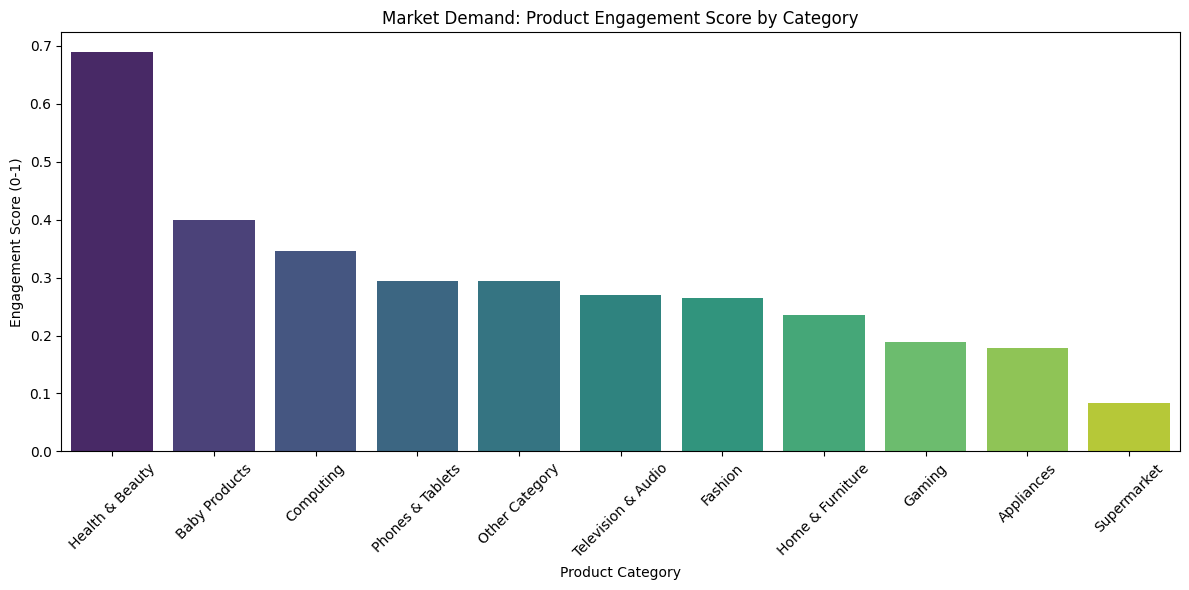

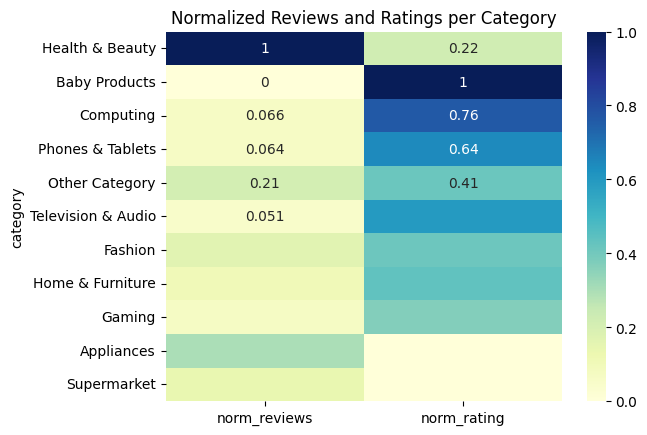

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=category_stats, x='category', y='engagement_score', palette='viridis')
plt.title('Market Demand: Product Engagement Score by Category')
plt.ylabel('Engagement Score (0-1)')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Heatmap for detail
heat_data = category_stats[['category', 'norm_reviews', 'norm_rating']].set_index('category')
sns.heatmap(heat_data, annot=True, cmap='YlGnBu')
plt.title('Normalized Reviews and Ratings per Category')
plt.show()
